In [7]:
import os
import re

import pandas as pd
import pytesseract
import imutils
import numpy as np
import face_recognition


image_dir = 'ifes'
ocr_dir = image_dir + '_ocr'

In [4]:
image_files = os.listdir(image_dir)
if not os.path.isdir(ocr_dir):
    os.mkdir(ocr_dir)
print('Writing output of OCR to directory %s' % ocr_dir)
for f in image_files:
    image_file = os.path.join(image_dir, f)
    info = pytesseract.image_to_data(image_file, lang='spa')
    text = pytesseract.image_to_string(image_file, lang='spa')
    text_file = os.path.join(ocr_dir, os.path.splitext(f)[0]+'.txt')
    tsv_file = os.path.join(ocr_dir, os.path.splitext(f)[0]+'.tsv')
    with open(tsv_file, 'wt') as file:
        file.write(info)
    with open(text_file, 'wt') as file:
        file.write(text)

Writing output of OCR to directory ifes_ocr


In [11]:
import os
import re

import pandas as pd
import pytesseract
import numpy as np
import face_recognition

from preproces_tsv import tsv_prep 
import web_search

In [12]:
def datavio(front_path, tsv_front, tsv_back):
    # Detect face
    image = face_recognition.load_image_file(front_path)
    face_locations = face_recognition.face_locations(image, model="cnn")
    print("I found {} face(s) in this photograph.".format(len(face_locations)))
    
    for face_location in face_locations:

        # Print the location of each face in this image
        top, right, bottom, left = face_location
        print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

        # You can access the actual face itself like this:
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image)
        display(pil_image)
    
    tsv_front = pd.read_csv(tsv_front, sep=r'\t', dtype={'text': str}, engine='python')
    tsv_back = pd.read_csv(tsv_back, sep=r'\t', dtype={'text': str}, engine='python')
    
    tsv = tsv_prep(tsv_front, tsv_back)
    prep_text = tsv.preprocess()
    df = prep_text.to_frame("data").reset_index()
    df = df.T
    df.columns = df.iloc[0]
    df_final = df.drop(df.index[0]).set_index(pd.Index([0]))
    
    if df_final['tipo_cred'].values[0] == 'a':
        df_final['ocr_vertical'] = str(int(df_final.loc['ocr_vertical']))
    elif df['tipo_cred'].values[0] == 'd':
        df_final['ocr_horizontal'] = str(int(df.loc['ocr_horizontal']))
        df_final['cic'] = str(int(df_final.loc['cic']))
    elif df_final['tipo_cred'].values[0] == 'e':
        df_final['cve_ciudadano'] = str(int(df_final.loc['cve_ciudadano']))
        df_final['cic'] = str(int(df_final.loc['cic']))
        
    id_check = web_search.consulta_id(df_final)
    res = id_check.ine_check(api_key='f93c8b9646c63020ef084ecac088583d')
    
    return res

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 223, Left: 300, Bottom: 427, Right: 504


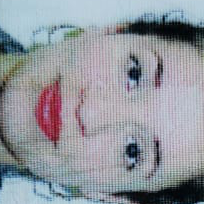

d
All the data-sitekeys are identical



<!DOCTYPE html>

<html lang="es">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="El Instituto Nacional Electoral es el organismo público autónomo de México encargado de organizar las elecciones federales, es decir, la elección del Presidente de la República, Diputados y Senadores que integran el Congreso de la Unión, así como organizar, en coordinación con los organismos electorales de las entidades federativas, las elecciones locales en los estados de la República y el Distrito Federal." name="description"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<link href="images/favicon.png" rel="shortcut icon"/>
<title>Lista Nominal | INE</title>
<!-- Bootstrap -->
<link href="utilidades/bootstrap/css/bootstrap.min.css" rel="stylesheet"/>
<link href="utilidades/fontawesome/css/font-awesome.min.css" rel="stylesheet" type="text/css"/>
<

In [13]:
datavio("ifes/1_front.jpeg", "ifes_ocr/1_front.tsv", "ifes_ocr/1_back.tsv")

In [8]:
# Detect faces
image = face_recognition.load_image_file("ifes/1_front.jpeg")
face_locations = face_recognition.face_locations(image, model="cnn")
print("I found {} face(s) in this photograph.".format(len(face_locations)))

I found 1 face(s) in this photograph.


In [2]:
from preproces_tsv import tsv_prep 

In [3]:
tsv_front = pd.read_csv("ifes_ocr/1_front.tsv", sep=r'\t', dtype={'text': str}, engine='python')
tsv_back = pd.read_csv("ifes_ocr/1_back.tsv", sep=r'\t', dtype={'text': str}, engine='python')

In [4]:
test = tsv_prep(tsv_front, tsv_back)

In [5]:
prep_text = test.preprocess()

In [7]:
df = prep_text.to_frame("data").reset_index()

In [8]:
df = df.T

In [9]:
df.columns = df.iloc[0]

In [10]:
df_final = df.drop(df.index[0]).set_index(pd.Index([0]))

In [11]:
df_final

index,tipo_cred,cve_elec,emision,ocr_vertical,ocr_horizontal,cic,cve_ciudadano,err_msg
0,d,,,,2054137886429,1189756504,,


In [12]:
import web_search

In [13]:
if df_final['tipo_cred'].values[0] == 'a':
    df_final['ocr_vertical'] = str(int(df_final.loc['ocr_vertical']))
elif df['tipo_cred'].values[0] == 'd':
    df_final['ocr_horizontal'] = str(int(df.loc['ocr_horizontal']))
    df_final['cic'] = str(int(df_final.loc['cic']))
elif df_final['tipo_cred'].values[0] == 'e':
    df_final['cve_ciudadano'] = str(int(df_final.loc['cve_ciudadano']))
    df_final['cic'] = str(int(df_final.loc['cic']))

In [16]:
id_check = web_search.consulta_id(df_final)

In [17]:
res = id_check.ine_check(api_key='f93c8b9646c63020ef084ecac088583d')

d
All the data-sitekeys are identical


In [18]:
res


<!DOCTYPE html>

<html lang="es">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="El Instituto Nacional Electoral es el organismo público autónomo de México encargado de organizar las elecciones federales, es decir, la elección del Presidente de la República, Diputados y Senadores que integran el Congreso de la Unión, así como organizar, en coordinación con los organismos electorales de las entidades federativas, las elecciones locales en los estados de la República y el Distrito Federal." name="description"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<link href="images/favicon.png" rel="shortcut icon"/>
<title>Lista Nominal | INE</title>
<!-- Bootstrap -->
<link href="utilidades/bootstrap/css/bootstrap.min.css" rel="stylesheet"/>
<link href="utilidades/fontawesome/css/font-awesome.min.css" rel="stylesheet" type="text/css"/>
<